## Intial Structure
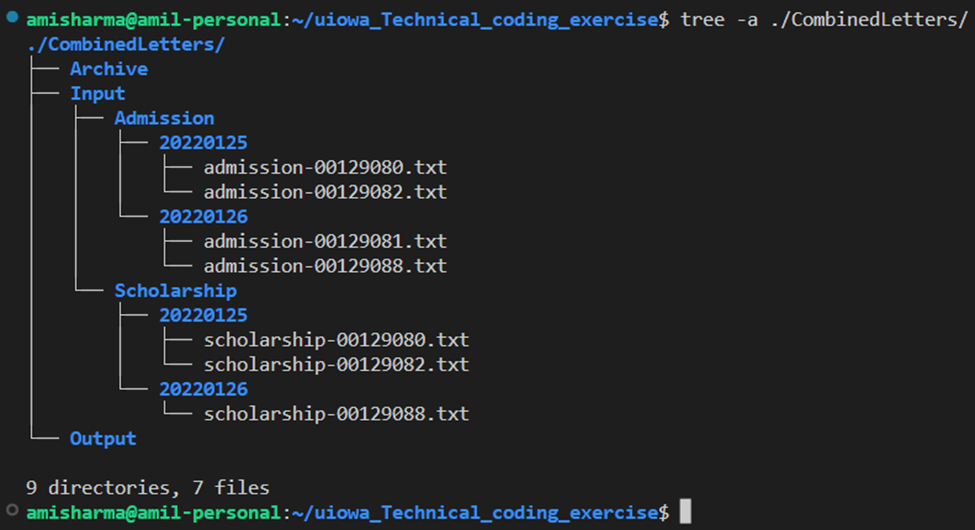

In [18]:
# 1.Archive the files from the Input folder to the Archive folder
import os
inputFolder = "./CombinedLetters/Input"
archiveFolder = "./CombinedLetters/Archive"
# Archiving the files from the Input folder to the Archive folder
for root, dirs, files in os.walk(inputFolder):
    for file in files:
        if file.endswith(".txt"):
            # Appending the date beofre the file name
            os.rename(os.path.join(root, file), os.path.join(root, root.split("/")[-1] + "_" + file))
            # Moving the file to the archive folder
            os.rename(os.path.join(root, root.split("/")[-1] + "_" + file), os.path.join(archiveFolder, root.split("/")[-1] + "_" + file))

In [20]:
!tree -a ./CombinedLetters/

./CombinedLetters/
├── Archive
│   ├── 20220125_admission-00129080.txt
│   ├── 20220125_admission-00129082.txt
│   ├── 20220125_scholarship-00129080.txt
│   ├── 20220125_scholarship-00129082.txt
│   ├── 20220126_admission-00129081.txt
│   ├── 20220126_admission-00129088.txt
│   └── 20220126_scholarship-00129088.txt
├── Input
│   ├── Admission
│   │   ├── 20220125
│   │   └── 20220126
│   └── Scholarship
│       ├── 20220125
│       └── 20220126
└── Output

9 directories, 7 files


In [21]:
# 2.Find out students who have both admission letters and scholarship letters on the day of processing.
day="20220125"
def getStudentsWithBothLettersOnSameDay(archiveFolder, day):
    studentsWithBothLetters = []
    listOfLetters = os.listdir(archiveFolder)
    for letter in listOfLetters:
        if letter.startswith(day+"_"+ "admission-"):
            studentId = letter.split("-")[1].split(".")[0]
            if day+"_"+"scholarship-"+studentId+".txt" in listOfLetters:
                studentsWithBothLetters.append(studentId)
    return studentsWithBothLetters



In [22]:
studentsWithBothLetters

['00129080', '00129082']

In [37]:
# 2.1.Combine letters for each student on the day of processing and save all combined letters to a place in the Output folder.
def combineLetters(studentIds, day):
    for studentId in studentIds:
        admissionLetter = open(archiveFolder+ "/"+ day + "_admission-"+studentId+".txt", "r").read()
        scholarshipLetter = open(archiveFolder+"/"+ day + "_scholarship-"+studentId+".txt", "r").read()
        combinedLetter = admissionLetter + "\n" + scholarshipLetter
        # writing the combined letter to a file
        with open("./CombinedLetters/Output/"+day+"_"+studentId+".txt", "w") as f:
            f.write(combinedLetter)


In [38]:
combineLetters(studentIds = studentsWithBothLetters, day="20220125")

In [39]:
!tree -a ./CombinedLetters/

./CombinedLetters/
├── Archive
│   ├── 20220125_admission-00129080.txt
│   ├── 20220125_admission-00129082.txt
│   ├── 20220125_scholarship-00129080.txt
│   ├── 20220125_scholarship-00129082.txt
│   ├── 20220126_admission-00129081.txt
│   ├── 20220126_admission-00129088.txt
│   └── 20220126_scholarship-00129088.txt
├── Input
│   ├── Admission
│   │   ├── 20220125
│   │   └── 20220126
│   └── Scholarship
│       ├── 20220125
│       └── 20220126
└── Output
    ├── 20220125_00129080.txt
    └── 20220125_00129082.txt

9 directories, 9 files


In [40]:
# 3. Generate a text report in the following format, which contains the processing date, the total number
# of combined letters and their corresponding University IDs. The text report file should be placed in
# the same folder as the combined letters.


In [42]:
# generating the report
def generateReport(studentIds, day):
    with open("./CombinedLetters/Output/"+day+"_Report.txt", "w") as f:
        f.write(day+" Report\n")
        f.write("-----------------\n")
        f.write("Number of combined letters: "+str(len(studentIds))+"\n")
        for studentId in studentIds:
            f.write("\t"+studentId+"\n")

In [43]:
# The generated report function can be declared before combineLetters function 
# And can be called withing the combineLetters function, this will make the code more optimized
# I haven't done that because I wanted to show the code in the way it is written in the question

In [44]:
generateReport(studentIds = studentsWithBothLetters, day="20220125")

In [45]:
!tree -a ./CombinedLetters/

./CombinedLetters/
├── Archive
│   ├── 20220125_admission-00129080.txt
│   ├── 20220125_admission-00129082.txt
│   ├── 20220125_scholarship-00129080.txt
│   ├── 20220125_scholarship-00129082.txt
│   ├── 20220126_admission-00129081.txt
│   ├── 20220126_admission-00129088.txt
│   └── 20220126_scholarship-00129088.txt
├── Input
│   ├── Admission
│   │   ├── 20220125
│   │   └── 20220126
│   └── Scholarship
│       ├── 20220125
│       └── 20220126
└── Output
    ├── 20220125_00129080.txt
    ├── 20220125_00129082.txt
    └── 20220125_Report.txt

9 directories, 10 files


In [46]:
!cat ./CombinedLetters/Output/20220125_Report.txt

20220125 Report
-----------------
Number of combined letters: 2
	00129080
	00129082


In [47]:
# For testing your application or writing automatic tests, you can use any string (for example, the
# filename) as the content for each text file.
